In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
data = pd.read_csv("D:/Advanced_training/Advanced-training-Python-AIML/TASK/Day-6/50_Startups.csv")

In [119]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [120]:
## Total new values in this dataset
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [121]:
## there is no null values in this dataset so no need to fill anything
## unique value in data
data.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

## univariante analysis

In [122]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


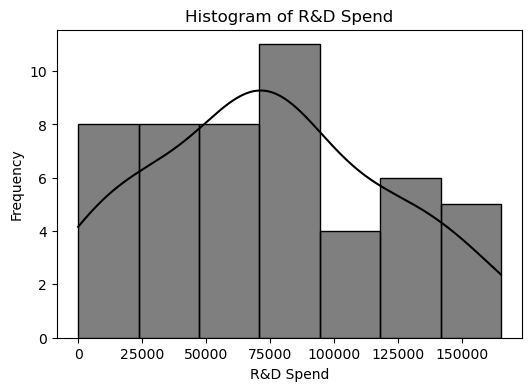

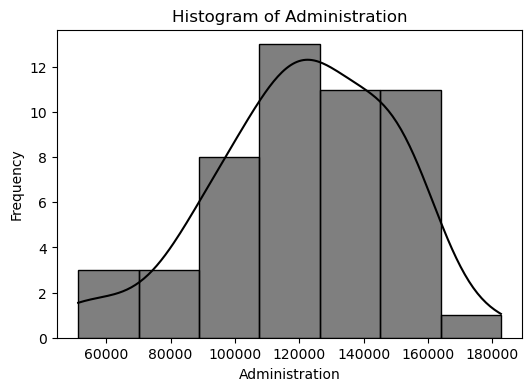

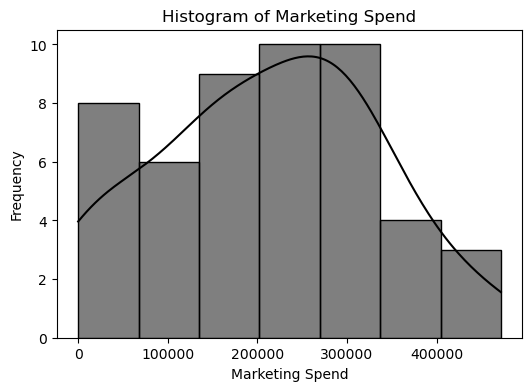

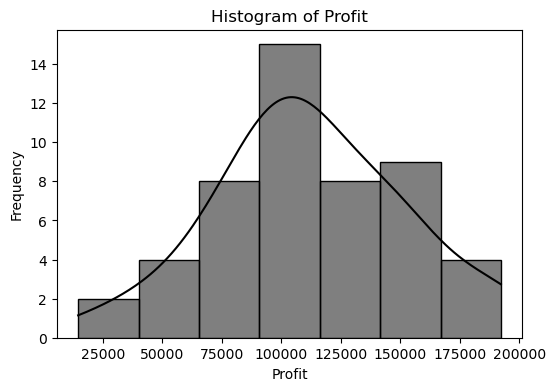

In [124]:
numeric_cols = ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, color='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## bivariant Analysis

In [125]:
# correation matrix
data.drop(columns=['State'],inplace=True)

In [126]:
data.corr() # from this we can identify that how the two feature are related to each other

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


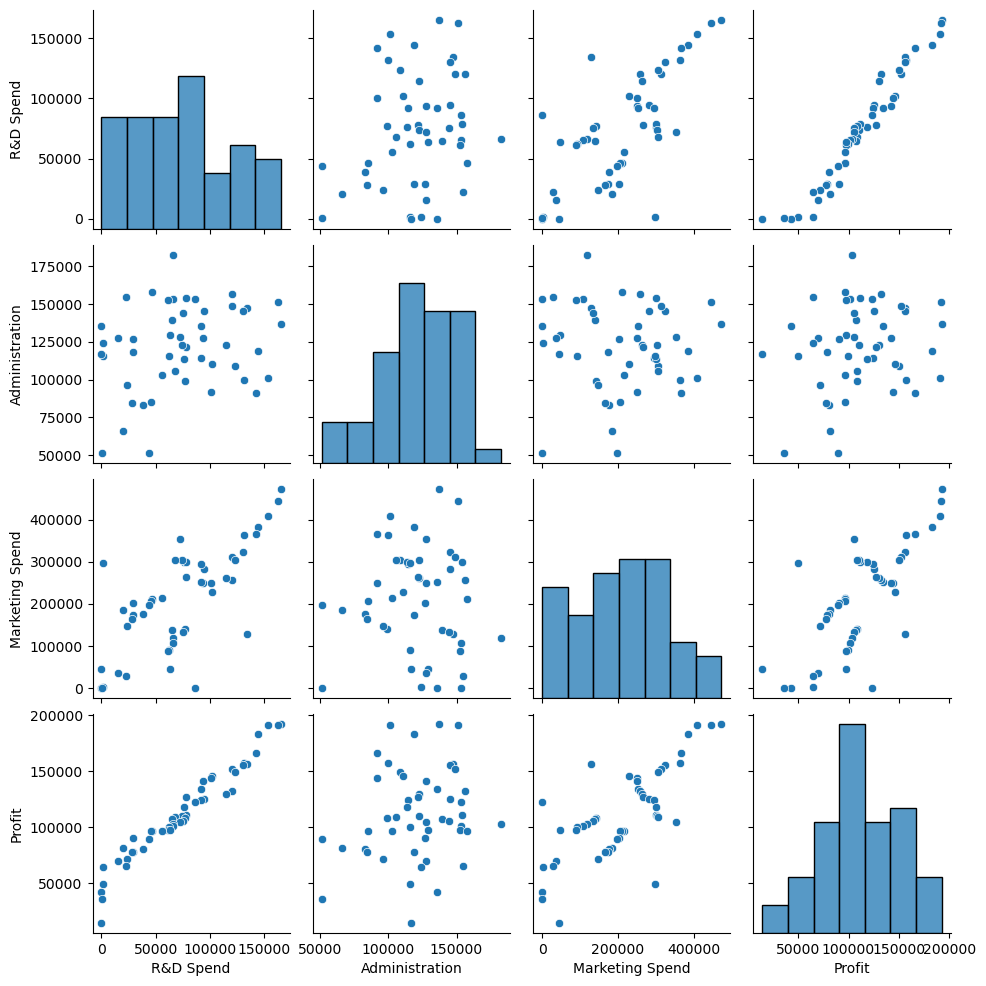

In [127]:
sns.pairplot(data) # its show pair plot between two features how thay are correated to each other

In [128]:
X = data.drop(columns=["Profit"])
y = data["Profit"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

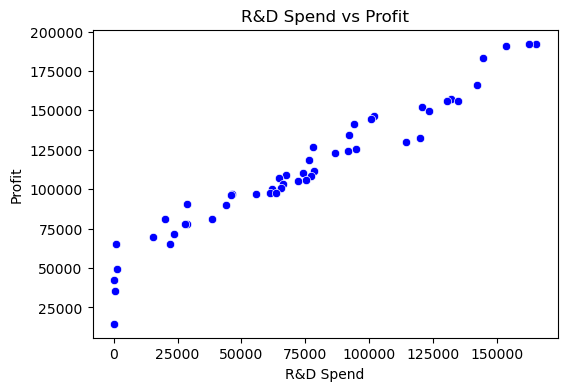

In [129]:
plt.figure(figsize=(6, 4)) # Becuse R&D Spend is more related with profit
sns.scatterplot(x=data['R&D Spend'], y=data['Profit'], color='blue')
plt.title("R&D Spend vs Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()


In [130]:
# Polynomial Regression with degree 2 use pipeline
degree = 2
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("lin_reg", LinearRegression())
])

model.fit(x_train, y_train)

# Predictions
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)


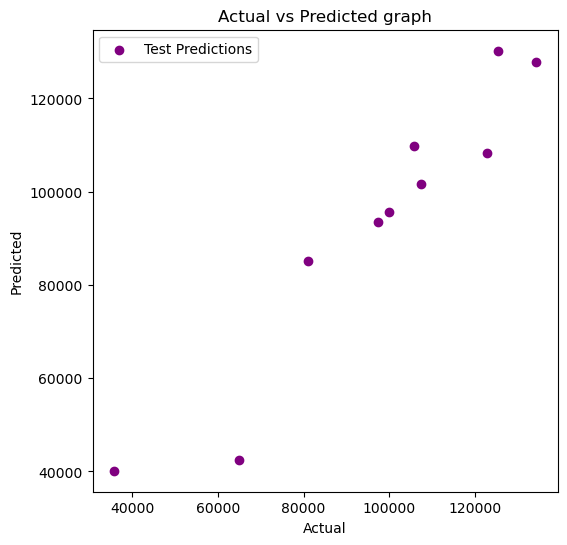

In [131]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, color='purple', label='Test Predictions')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted graph")
plt.legend()

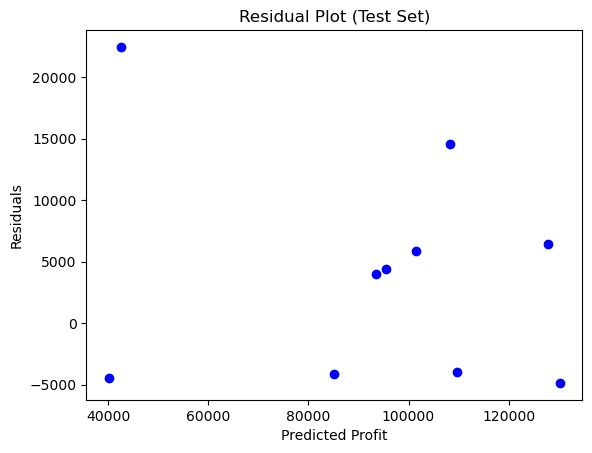

In [132]:
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, color='blue')
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.show()

In [134]:
print("R² Score:", )
print("MSE:", )


R² Score:
MSE: 90304882.2658185


In [136]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
r2_sco = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

In [137]:
print("r2_score : ",r2_sco)
print("mse : ",mse)
print("mae : ",mae)
print("rmse : ",np.sqrt(mae)

r2_score :  0.8884838649338866
mse :  90304882.2658185
mae :  7506.064596574058
